In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Read the csv file with the movie database
data = pd.read_csv("movie_revenues.csv")

# Make a new dataframe only with the explanatory variables that we need 
my_df = data[["budget","original_language","runtime","popularity"]]

# Turn the original language column into binary
my_df["original_language"] = my_df["original_language"].apply(lambda x: 1 if x == 'en' else 0)
 
# Compute the correlations between the explanatory variables that we have chosen and revenue      
corr_budget = my_df["budget"].corr(data["revenue"])
print(corr_budget)
corr_language = my_df["original_language"].corr(data["revenue"])
print(corr_language)
corr_runtime = my_df["runtime"].corr(data["revenue"])
print(corr_runtime)
corr_popularity = my_df["popularity"].corr(data["revenue"])
print(corr_popularity)



0.7529645103815288
0.1421298728540003
0.21638013018147206
0.4614602896736129


C:\Users\kirez\AppData\Local\Temp\ipykernel_29412\1231807093.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  my_df["original_language"] = my_df["original_language"].apply(lambda x: 1 if x == 'en' else 0)


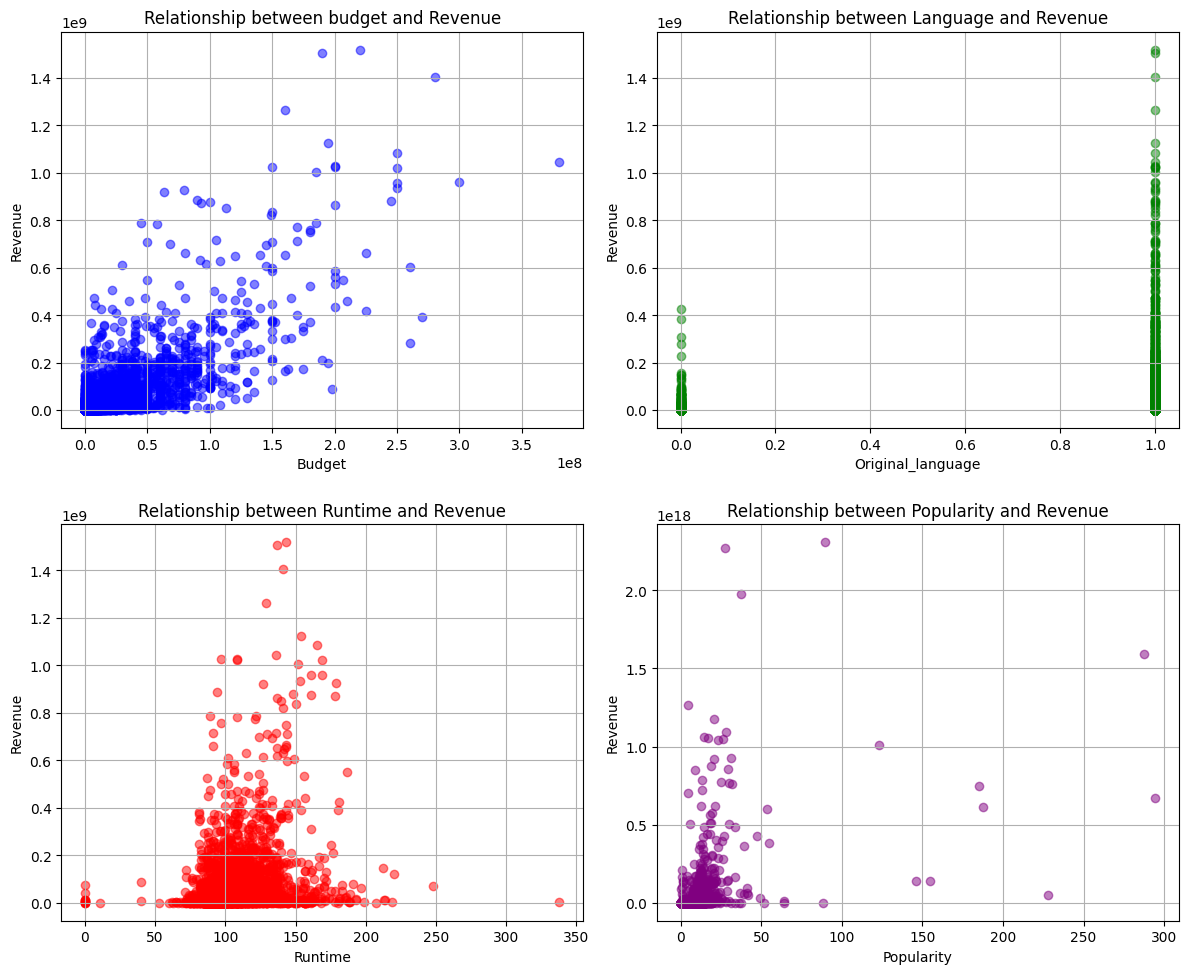

In [27]:
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Scatter plot 1: Relationship between budget and Revenue
axs[0, 0].scatter(data['budget'], data['revenue'], color='blue', alpha=0.5)
axs[0, 0].set_title('Relationship between budget and Revenue')
axs[0, 0].set_xlabel('Budget')
axs[0, 0].set_ylabel('Revenue')
axs[0, 0].grid(True)

# Scatter plot 2: Relationship between Language and Revenue
axs[0, 1].scatter(my_df["original_language"], data['revenue'], color='green', alpha=0.5)
axs[0, 1].set_title('Relationship between Language and Revenue')
axs[0, 1].set_xlabel('Original_language')
axs[0, 1].set_ylabel('Revenue')
axs[0, 1].grid(True)

# Scatter plot 3: Relationship between Runtime and Revenue
axs[1, 0].scatter(data['runtime'], data['revenue'], color='red', alpha=0.5)
axs[1, 0].set_title('Relationship between Runtime and Revenue')
axs[1, 0].set_xlabel('Runtime')
axs[1, 0].set_ylabel('Revenue')
axs[1, 0].grid(True)

# Scatter plot 4: Relationship between Popularity and Revenue
axs[1, 1].scatter(data['popularity'], data['revenue'] ** 2, color='purple', alpha=0.5)
axs[1, 1].set_title('Relationship between Popularity and Revenue')
axs[1, 1].set_xlabel('Popularity')
axs[1, 1].set_ylabel('Revenue')
axs[1, 1].grid(True)

# Adjust layout
plt.tight_layout()
plt.show()

In [28]:
import ast
from collections import Counter

# Handle potential NaN values before conversion
data['cast'] = data['cast'].apply(lambda x: "[]" if pd.isna(x) else x)
# Convert the 'cast' column from string representation of lists to actual lists
data['cast'] = data['cast'].apply(ast.literal_eval)

actor_counts = Counter()
for movie_cast in data['cast']:
    for actor in movie_cast:
        actor_counts[actor['name']] += 1

# Find the actor with the most appearances
most_frequent_actor = actor_counts.most_common(1)[0][0]
most_common_actors = actor_counts.most_common(2)
second_most_common_actor = most_common_actors[1][0]
print(second_most_common_actor)
print(f"The actor who appears in the most movies is: {most_frequent_actor}")

def extract_cast_features(cast_list):
    actor_in_cast = any((member.get('name') == 'Samuel L. Jackson' or member.get('name') == 'Anne Hathaway' ) for member in cast_list)
    return actor_in_cast

# Apply the function to create new columns
extracted_features = data['cast'].apply(lambda x: pd.Series(extract_cast_features(x)))

# Assign the extracted features to the DataFrame
my_df['actor_in_cast'] = extracted_features[0].astype(int)
my_df['revenue'] = data["revenue"]
print(my_df)

Robert De Niro
The actor who appears in the most movies is: Samuel L. Jackson
        budget  original_language  runtime  popularity  actor_in_cast  \
0     14000000                  1     93.0    6.575393              0   
1     40000000                  1    113.0    8.248895              1   
2      3300000                  1    105.0   64.299990              0   
3      1200000                  0    122.0    3.174936              0   
4            0                  0    118.0    1.148070              0   
...        ...                ...      ...         ...            ...   
2995         0                  1    102.0    9.853270              0   
2996         0                  0    102.0    3.727996              0   
2997  65000000                  1    120.0   14.482345              1   
2998  42000000                  1     90.0   15.725542              0   
2999  35000000                  1    106.0   10.512109              0   

        revenue  
0      12314651  
1      95

C:\Users\kirez\AppData\Local\Temp\ipykernel_29412\2295456772.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  my_df['actor_in_cast'] = extracted_features[0].astype(int)
C:\Users\kirez\AppData\Local\Temp\ipykernel_29412\2295456772.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  my_df['revenue'] = data["revenue"]


In [29]:
import statsmodels.api as sm

# Check for and handle missing values
my_df = my_df.dropna()

# Convert numeric columns to proper numeric types
my_df['budget'] = pd.to_numeric(my_df['budget'], errors='coerce')
my_df['runtime'] = pd.to_numeric(my_df['runtime'], errors='coerce')
my_df['popularity'] = pd.to_numeric(my_df['popularity'], errors='coerce')
my_df['revenue'] = pd.to_numeric(my_df['revenue'], errors='coerce')

# Drop any remaining rows with missing values after conversion
my_df = my_df.dropna()

# Define predictors (independent variables) and target variable
X = my_df.drop(columns=['revenue'])  # Predictors
y = my_df['revenue']  # Target variable

# Add a constant to the predictors matrix for the intercept
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X)
results = model.fit()

# Print the summary of the regression
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.622
Model:                            OLS   Adj. R-squared:                  0.622
Method:                 Least Squares   F-statistic:                     986.3
Date:                Sun, 16 Jun 2024   Prob (F-statistic):               0.00
Time:                        14:47:51   Log-Likelihood:                -58975.
No. Observations:                2998   AIC:                         1.180e+05
Df Residuals:                    2992   BIC:                         1.180e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -2.494e+07   9.16e+0

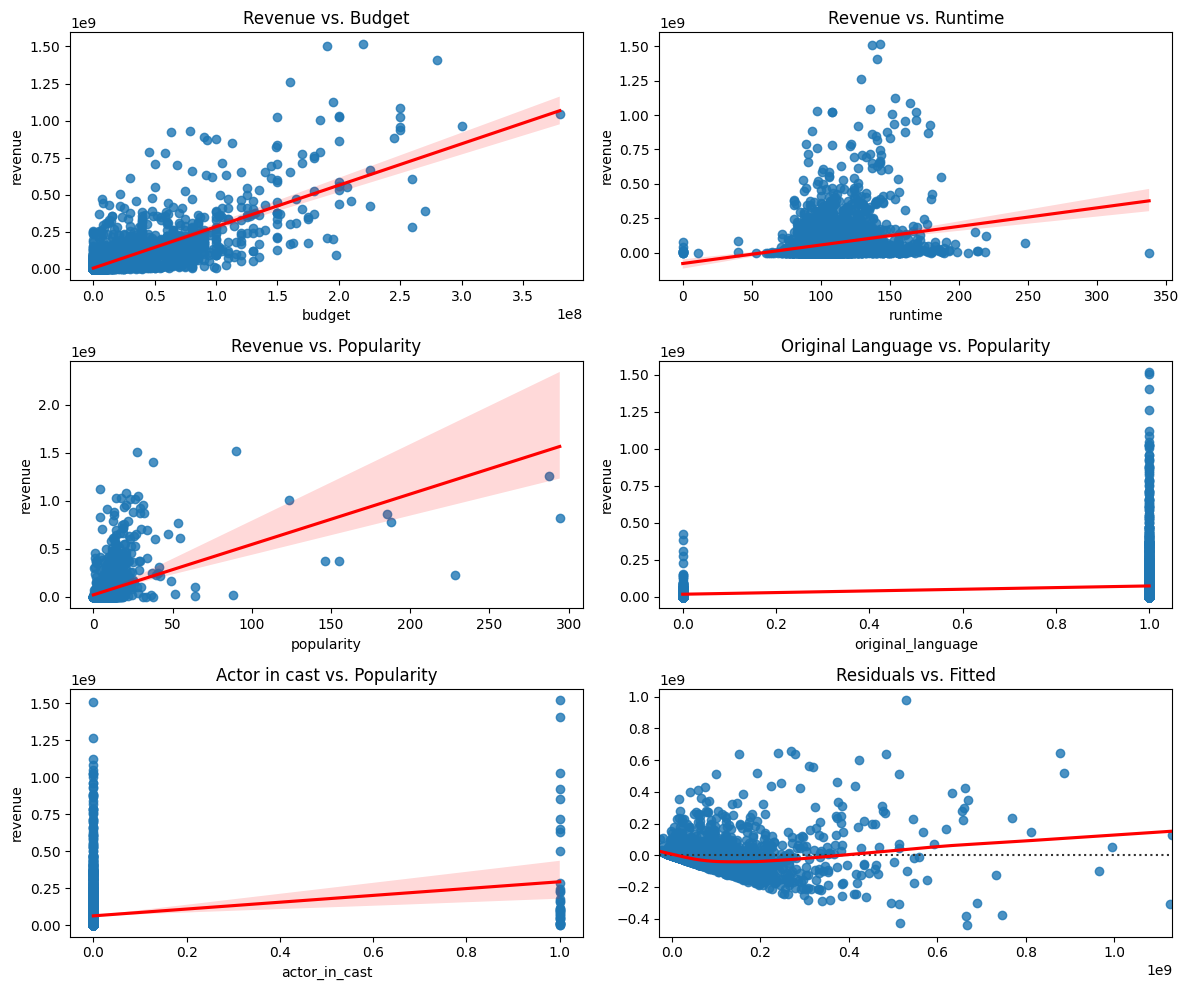

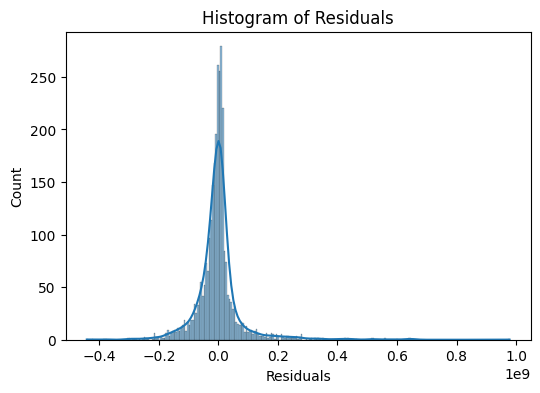

In [30]:
import seaborn as sns

predictions = results.predict(X)
residuals = y - predictions

fig, axes = plt.subplots(3, 2, figsize=(12, 10))
sns.regplot(x=X['budget'], y=y, ax=axes[0, 0], line_kws={"color": "red"}).set_title('Revenue vs. Budget')
sns.regplot(x=X['runtime'], y=y, ax=axes[0, 1], line_kws={"color": "red"}).set_title('Revenue vs. Runtime')
sns.regplot(x=X['popularity'], y=y, ax=axes[1, 0], line_kws={"color": "red"}).set_title('Revenue vs. Popularity')
sns.regplot(x=X['original_language'], y=y, ax=axes[1, 1], line_kws={"color": "red"}).set_title('Original Language vs. Popularity')
sns.regplot(x=X['actor_in_cast'], y=y, ax=axes[2, 0], line_kws={"color": "red"}).set_title('Actor in cast vs. Popularity')
sns.residplot(x=predictions, y=residuals, lowess=True, ax=axes[2, 1], line_kws={"color": "red"}).set_title('Residuals vs. Fitted')
plt.tight_layout()
plt.show()

# Histogram of residuals
plt.figure(figsize=(6, 4))
sns.histplot(residuals, kde=True)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.show()


In [31]:
# Slope associated with the most predictive variable
slope_popularity = results.params['budget']
print(slope_popularity)

# Significant variables
significant_variables = results.pvalues[results.pvalues < 0.05].index.tolist()
print(significant_variables)

2.447774012488113
['const', 'budget', 'runtime', 'popularity', 'actor_in_cast']
